# Impact of numerical features on the outcome

Loading the data and performing some initial exploration on it to acquire some basic knowledge about the data, how the various features are distributed.

<a id="importing"></a>
## Importing libraries and packages

In [1]:
# Mathematical operations and data manipulation
import numpy as np
import pandas as pd

# Statistics
from scipy.stats import ttest_ind
from scipy.stats import ks_2samp

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Warnings
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

<a id="set-paths"></a>
## Set paths

In [2]:
# Path to datasets directory
data_path = "./datasets"
# Path to assets directory (for saving results to)
assets_path = "./assets"

<a id="loading-data"></a>
## Loading dataset

In [3]:
# load data
dataset = pd.read_csv(f"{data_path}/bank-additional-full.csv", sep=";")
dataset.head().T

0            1            2            3  \
age                      56           57           37           40   
job               housemaid     services     services       admin.   
marital             married      married      married      married   
education          basic.4y  high.school  high.school     basic.6y   
default                  no      unknown           no           no   
housing                  no           no          yes           no   
loan                     no           no           no           no   
contact           telephone    telephone    telephone    telephone   
month                   may          may          may          may   
day_of_week             mon          mon          mon          mon   
duration                261          149          226          151   
campaign                  1            1            1            1   
pdays                   999          999          999          999   
previous                  0            0            0            0   
poutcome        nonexistent  nonexistent  nonexistent  nonexistent   
emp.var.rate            1.1          1.1          1.1          1.1   
cons.price.idx       93.994       93.994       93.994       93.994   
cons.conf.idx         -36.4        -36.4        -36.4        -36.4   
euribor3m             4.857        4.857        4.857        4.857   
nr.employed          5191.0       5191.0       5191.0       5191.0   
y                        no           no           no           no   

                          4  
age                      56  
job                services  
marital             married  
education       high.school  
default                  no  
housing                  no  
loan                    yes  
contact           telephone  
month                   may  
day_of_week             mon  
duration                307  
campaign                  1  
pdays                   999  
previous                  0  
poutcome        nonexistent  
emp.var.rate            1.1  
cons.price.idx       93.994  
cons.conf.idx         -36.4  
euribor3m             4.857  
nr.employed          5191.0  
y                        no

<a id="exploring-data"></a>
## Exploring dataset

In [4]:
# Printing dimensionality of the data, columns, types and missing values
print(f"Data dimension: {dataset.shape}")
for col in dataset.columns:
    print(
        f"Column: {col:35} | "
        f"type: {str(dataset[col].dtype):7} | "
        f"missing values: {dataset[col].isna().sum():3d}"
    )

Data dimension: (41188, 21)
Column: age                                 | type: int64   | missing values:   0
Column: job                                 | type: object  | missing values:   0
Column: marital                             | type: object  | missing values:   0
Column: education                           | type: object  | missing values:   0
Column: default                             | type: object  | missing values:   0
Column: housing                             | type: object  | missing values:   0
Column: loan                                | type: object  | missing values:   0
Column: contact                             | type: object  | missing values:   0
Column: month                               | type: object  | missing values:   0
Column: day_of_week                         | type: object  | missing values:   0
Column: duration                            | type: int64   | missing values:   0
Column: campaign                            | type: int64   | missing 

In [5]:
# Numerical features
numerical_features = [
    col
    for col in dataset.columns
    if np.issubdtype(dataset[col].dtype, np.number)
]
print(numerical_features)

['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [6]:
# Computing statistics on numerical features
dataset[numerical_features].describe().T

count         mean         std       min       25%  \
age             41188.0    40.024060   10.421250    17.000    32.000   
duration        41188.0   258.285010  259.279249     0.000   102.000   
campaign        41188.0     2.567593    2.770014     1.000     1.000   
pdays           41188.0   962.475454  186.910907     0.000   999.000   
previous        41188.0     0.172963    0.494901     0.000     0.000   
emp.var.rate    41188.0     0.081886    1.570960    -3.400    -1.800   
cons.price.idx  41188.0    93.575664    0.578840    92.201    93.075   
cons.conf.idx   41188.0   -40.502600    4.628198   -50.800   -42.700   
euribor3m       41188.0     3.621291    1.734447     0.634     1.344   
nr.employed     41188.0  5167.035911   72.251528  4963.600  5099.100   

                     50%       75%       max  
age               38.000    47.000    98.000  
duration         180.000   319.000  4918.000  
campaign           2.000     3.000    56.000  
pdays            999.000   999.000   999.000  
previous           0.000     0.000     7.000  
emp.var.rate       1.100     1.400     1.400  
cons.price.idx    93.749    93.994    94.767  
cons.conf.idx    -41.800   -36.400   -26.900  
euribor3m          4.857     4.961     5.045  
nr.employed     5191.000  5228.100  5228.100

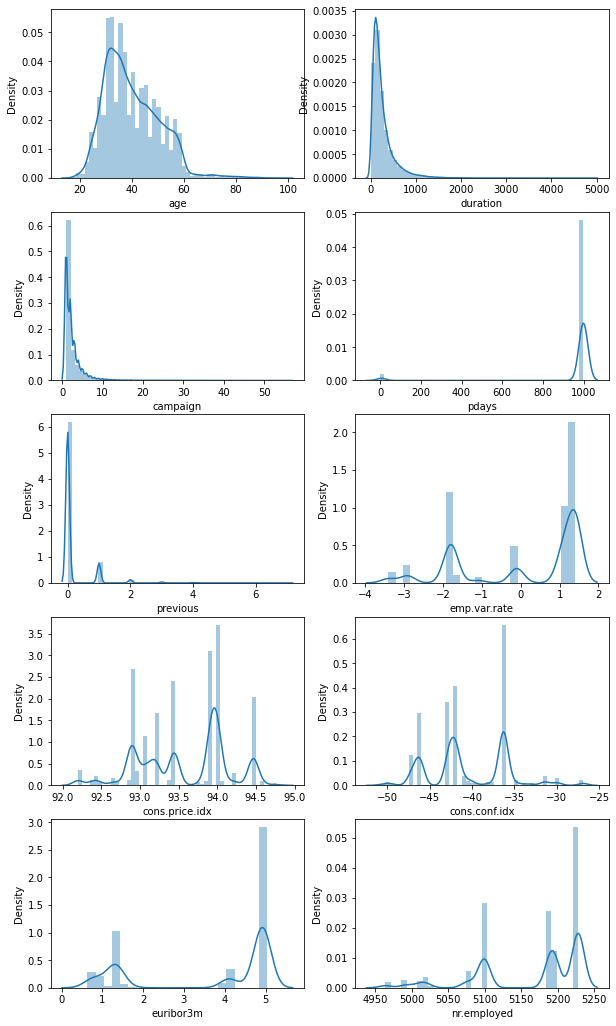

In [7]:
# Distributions of numerical features
plt.figure(figsize=(10, 18))
for index, col in enumerate(numerical_features):
    plt.subplot(5, 2, index + 1)
    sns.distplot(dataset[col])
plt.savefig(
    f"{assets_path}/numerical_distributions.png", format="png", dpi=500
)

In [8]:
# Categorical features
categorical_features = [
    col
    for col in dataset.columns
    if pd.api.types.is_string_dtype(dataset[col])
]

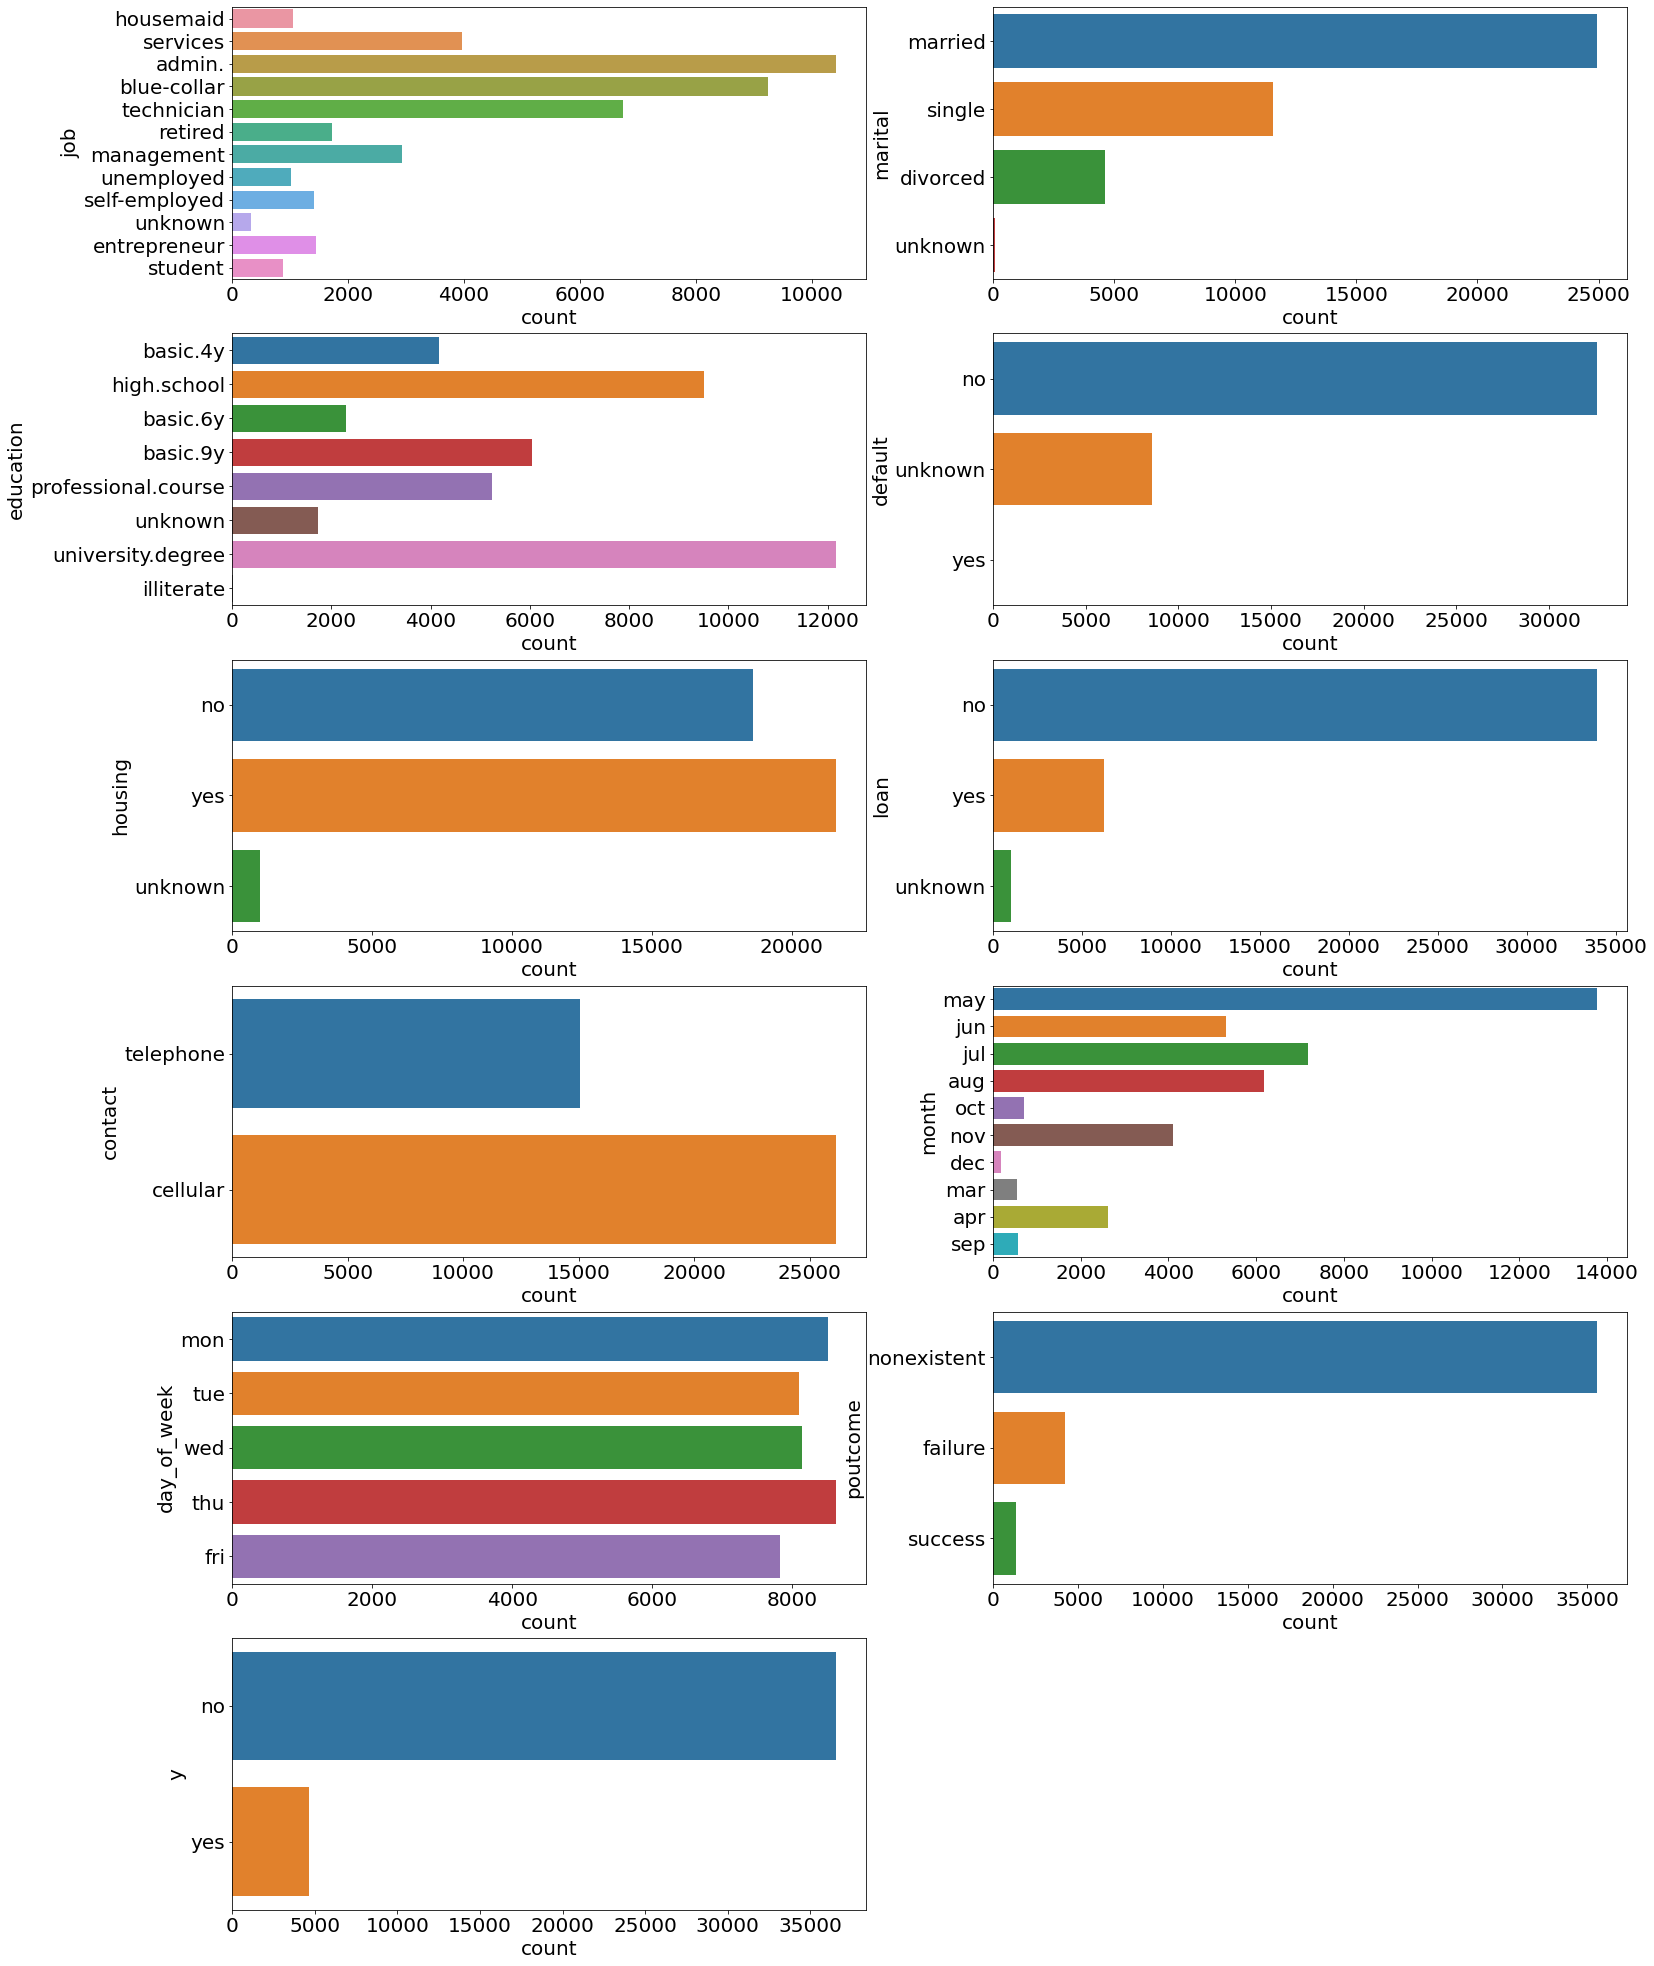

In [9]:
# Distributions of categorical features
plt.figure(figsize=(25, 35))
for index, col in enumerate(categorical_features):
    plt.subplot(6, 2, index + 1)
    ax = sns.countplot(y=col, data=dataset)
    ax.set_xlabel("count", fontsize=20)
    ax.set_ylabel(col, fontsize=20)
    ax.tick_params(labelsize=20)

plt.savefig(f"{assets_path}/categorical_counts.png", format="png", dpi=500)

<a id="analysis"></a>
## Analysis

Is there a statistically significant difference in numerical features for successful and non-successful marketing campaigns?

In [10]:
# Violin plots of numerical features against the outcome (y)
# of the marketing campaign
plt.figure(figsize=(10, 18))
for index, col in enumerate(numerical_features):
    plt.subplot(5, 2, index + 1)
    sns.violinplot(x=col, y="y", data=dataset, order=["yes", "no"])
plt.savefig(
    f"{assets_path}/violin_plots_numerical_features.png", format="png", dpi=500
)

In [11]:
# Function for computing mean of column for yes and no cases,
# and the test statistics and pvalue for equality of means test
def test_means(data, column):
    yes_mask = data["y"] == "yes"
    values_yes = data[column][yes_mask]
    values_no = data[column][~yes_mask]
    mean_yes = values_yes.mean()
    mean_no = values_no.mean()

    ttest_res = ttest_ind(values_yes, values_no)

    return [
        column,
        mean_yes,
        mean_no,
        round(ttest_res[0], 4),
        round(ttest_res[1], 4),
    ]


# define pandas dataframe, in which values should be filled
test_df = pd.DataFrame(
    columns=["column", "mean yes", "mean no", "ttest stat", "ttest pval"]
)

# for each column in the numerical_features, compute means
# and test statistics and fill the values in the dataframe
for index, col in enumerate(numerical_features):
    test_df.loc[index] = test_means(dataset, col)

test_df

column     mean yes      mean no  ttest stat  ttest pval
0             age    40.913147    39.911185      6.1721         0.0
1        duration   553.191164   220.844807     89.9672         0.0
2        campaign     2.051724     2.633085    -13.4965         0.0
3           pdays   792.035560   984.113878    -69.7221         0.0
4        previous     0.492672     0.132374     48.0027         0.0
5    emp.var.rate    -1.233448     0.248875    -63.4337         0.0
6  cons.price.idx    93.354386    93.603757    -27.9032         0.0
7   cons.conf.idx   -39.789784   -40.593097     11.1539         0.0
8       euribor3m     2.123135     3.811491    -65.6466         0.0
9     nr.employed  5095.115991  5176.166600    -76.9845         0.0

There is a statistically significant difference in the mean values for each of the numerical columns (the results from the p-value in the ttest pval column). This means that for each of the numerical features, the average value for successful marketing campaigns is significantly different from the average value for unsuccessful marketing campaigns.

In [12]:
# define function which performs Kolmogorov-Smirnov test,
# for provided column
def test_ks(data, column):
    yes_mask = data["y"] == "yes"
    values_yes = data[column][yes_mask]
    values_no = data[column][~yes_mask]

    kstest_res = ks_2samp(values_yes, values_no)

    return [column, round(kstest_res[0], 4), round(kstest_res[1], 4)]


# define pandas dataframe, in which values should be filled
test_df = pd.DataFrame(columns=["column", "ks stat", "ks pval"])

# for each column in the numerical_features,
# compute test statistics and fill the values in the dataframe
for index, col in enumerate(numerical_features):
    test_df.loc[index] = test_ks(dataset, col)

test_df

column  ks stat  ks pval
0             age   0.0861      0.0
1        duration   0.4641      0.0
2        campaign   0.0808      0.0
3           pdays   0.1934      0.0
4        previous   0.2102      0.0
5    emp.var.rate   0.4324      0.0
6  cons.price.idx   0.2281      0.0
7   cons.conf.idx   0.1998      0.0
8       euribor3m   0.4326      0.0
9     nr.employed   0.4324      0.0

The distributions of the various numerical features present a significant difference between successful and unsuccessful marketing campaigns.

<Figure size 720x720 with 0 Axes>

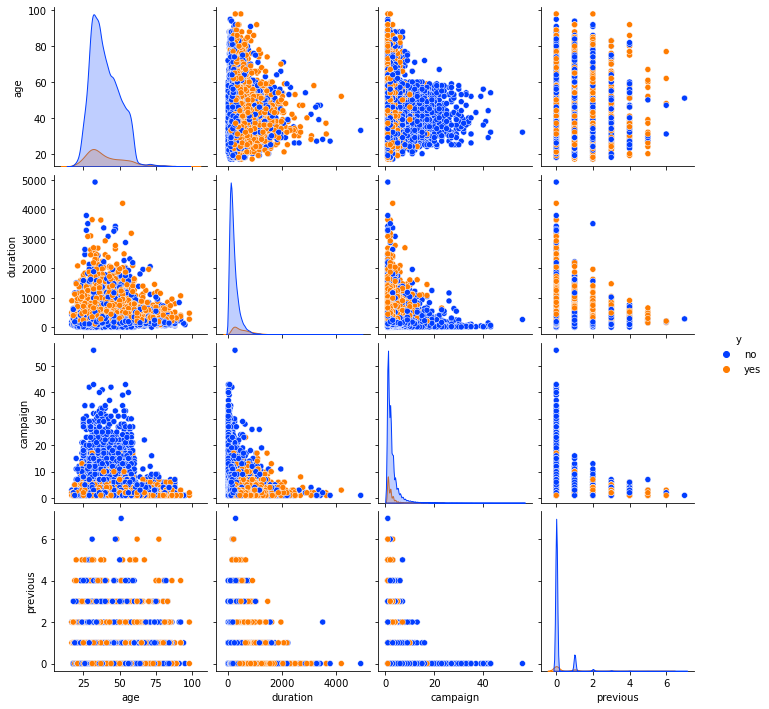

<Figure size 720x720 with 0 Axes>

In [13]:
# Arrays containing campaign and financial columns
campaign_columns = ["age", "duration", "campaign", "previous"]
financial_columns = [
    "emp.var.rate",
    "cons.price.idx",
    "cons.conf.idx",
    "euribor3m",
]

# Pairplot between campaign columns
plot_data = dataset[campaign_columns + ["y"]]
plt.figure(figsize=(10, 10))
sns.pairplot(plot_data, hue="y", palette="bright")
plt.savefig(f"{assets_path}/pairplot_campaign.png", format="png", dpi=300)

# Pairplot between financial features
plot_data = dataset[financial_columns + ["y"]]
plt.figure(figsize=(10, 10))
sns.pairplot(plot_data, hue="y", palette="bright")
plt.savefig(f"{assets_path}/pairplot_financial.png", format="png", dpi=300)

Most of the successful marketing campaigns were with newly contacted customers. A substantial peak is present for customers who were contacted the second time, but without success.

For lower values for the 3-month interest rates (the euribor3m column), the number of successful marketing calls is larger than the number of unsuccessful ones. The inverse situation happens when interest rates are higher. A possible explanation for this phenomenon is customer optimism when interest rates are lower.

In [14]:
# Mask for successful calls
successful_calls = dataset.y == "yes"

# Correlation matrix for successful calls
plot_data = dataset[campaign_columns + financial_columns][successful_calls]
successful_corr = plot_data.corr()
successful_corr.style.background_gradient(cmap="coolwarm").set_precision(2)

In [15]:
# Correlation matrix for unsuccessful calls
plot_data = dataset[campaign_columns + financial_columns][~successful_calls]
unsuccessful_corr = plot_data.corr()
unsuccessful_corr.style.background_gradient(cmap="coolwarm").set_precision(2)

In [16]:
# Plotting difference of successful - unsuccessful correlation matrices
diff_corr = successful_corr - unsuccessful_corr
diff_corr.style.background_gradient(cmap="coolwarm").set_precision(2)

The correlation between euribor3m and emp.var.rate is very high (approximately 0.93 for successful and 0.98 for unsuccessful calls). The first one relates to the average interest rate at which European banks lend money to other banks with maturity of 3 months, while the second one relates to the employment variation, that is, the rate at which people are hired or fired in an economy.

Another column that is also highly correlated with the previous two is the Consumer Price Index (CPI) column: cons.price.idx. The consumer confidence index is negatively correlated with the three mentioned columns for successful customer calls, and positively correlated for unsuccessful ones. This means that when the overall economic sentiment is pessimistic, people are willing to accept the new banking products and vice versa.